Goal of this notebook to test several classifiers on the data set with different features

1) Импортируем библиотеки

In [ ]:
# Импорт NumPy для работы с многомерными массивами и математическими функциями
import numpy as np

# Импорт Pandas для работы с табличными данными (DataFrame)
import pandas as pd

# Импорт базового модуля matplotlib для графиков
import matplotlib as mpl

# Импорт pyplot из matplotlib для построения графиков (стандартное сокращение plt)
import matplotlib.pyplot as plt

# Импорт Seaborn для улучшенной визуализации данных (на основе matplotlib)
import seaborn as sns

# Импорт модуля для работы со строковыми операциями
import string

# Импорт TF-IDF векторизатора для преобразования текста в числовые признаки
from sklearn.feature_extraction.text import TfidfVectorizer

# Импорт функции для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импорт стеммера Snowball для приведения слов к их основе
from nltk.stem import SnowballStemmer

# Импорт стоп-слов (малоинформативных слов, которые обычно удаляют)
from nltk.corpus import stopwords

# Импорт модели логистической регрессии для классификации
from sklearn.linear_model import LogisticRegression

# Импорт метода опорных векторов (SVM) для классификации
from sklearn.svm import SVC

# Импорт наивного байесовского классификатора для текстовых данных
from sklearn.naive_bayes import MultinomialNB

# Импорт классификатора на основе дерева решений
from sklearn.tree import DecisionTreeClassifier

# Импорт метода k-ближайших соседей (KNN) для классификации
from sklearn.neighbors import KNeighborsClassifier

# Импорт классификатора на основе случайного леса
from sklearn.ensemble import RandomForestClassifier

# Импорт AdaBoost - алгоритма бустинга на основе ансамбля слабых классификаторов
from sklearn.ensemble import AdaBoostClassifier

# Импорт BaggingClassifier - алгоритма бэггинга для построения ансамблей
from sklearn.ensemble import BaggingClassifier

# Импорт ExtraTreesClassifier - варианта случайного леса с дополнительной случайностью
from sklearn.ensemble import ExtraTreesClassifier

# Импорт метрики accuracy_score для оценки точности классификации
from sklearn.metrics import accuracy_score

# Магическая команда Jupyter для отображения графиков прямо в ноутбуке
%matplotlib inline

2) Загрузка и подготовка данных

In [ ]:
sms = pd.read_csv('spam.csv', encoding='latin-1') # чтение данных
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Now drop "unnamed" columns and rename v1 and v2 to "label" and "message"

In [ ]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1) # удаление лишних столбцов
sms = sms.rename(columns = {'v1':'label','v2':'message'}) # переименование столбцов

3) Анализ данных

In [ ]:
sms.groupby('label').describe() # группировка данных по меткам label

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Intresting that "Sorry, I'll call later" appears only 30 times here =)

Now let's create new feature "message length" and plot it to see if it's of any interest

In [ ]:
sms['length'] = sms['message'].apply(len) # добаввляем столбец с длиной сообщений
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

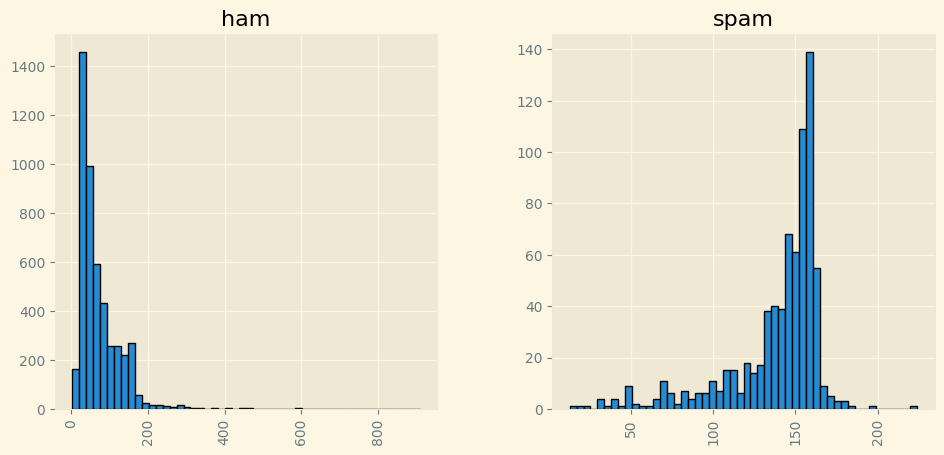

In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True # настройка визуализации
plt.style.use('Solarize_Light2') # стиль графика
sms.hist(column='length', by='label', bins=50,figsize=(11,5)) # визуализация распределение длин

Looks like the lengthy is the message, more likely it is a spam. Let's not forget this

4) Предобработка текста

In [ ]:
text_feat = sms['message'].copy() # создает независимую копию столбца с сообщениями

Now define our tex precessing function. It will remove any punctuation and stopwords aswell.

In [ ]:
# очищаем текст от лишних символов и слов которые не несут смысловой нагрузки
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation)) # удаляем пунктуацию
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] # удаление стоп-слова

    return " ".join(text)

In [ ]:
text_feat = sms['message'].apply(text_process) # применяем функцию ко всем сообщениям

5) Векторизация текста

In [ ]:
vectorizer = TfidfVectorizer() # создаем векторизатор

In [ ]:
features = vectorizer.fit_transform(text_feat) # преобразуем текст в числовые признаки

6) Разделение данных

First of all let's split our features to test and train set

In [ ]:
# разделение данных на обучающую и тестовую 70 на 30
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

Now let's import bunch of classifiers, initialize them and make a dictionary to itereate through

7) Создание и обучение классификаторов

In [ ]:
# создание несколько разных классификаторов
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [ ]:
# словарь для удобного доступа к классификаторам
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Создание различных моделей машинного обучения для сравнения их эффективности

In [ ]:
# функция для обучения
def train_classifier(clf, feature_train, labels_train):
    clf.fit(feature_train, labels_train)

In [ ]:
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

8) Оценка и сравнение моделей

In [ ]:
pred_scores = []
pred_dict={}
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train) # обучаем модель
    pred = predict_labels(v,features_test) # делаем предсказания
    pred_scores.append((k, [accuracy_score(labels_test,pred)])) # оцениваем точность
    pred_dict[k]=[accuracy_score(labels_test,pred)]

In [ ]:
# визуализируем результаты
df = pd.DataFrame.from_dict(pred_dict,orient='index', columns=['Score'])
df

,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.933014
BgC,0.966507
ETC,0.977273


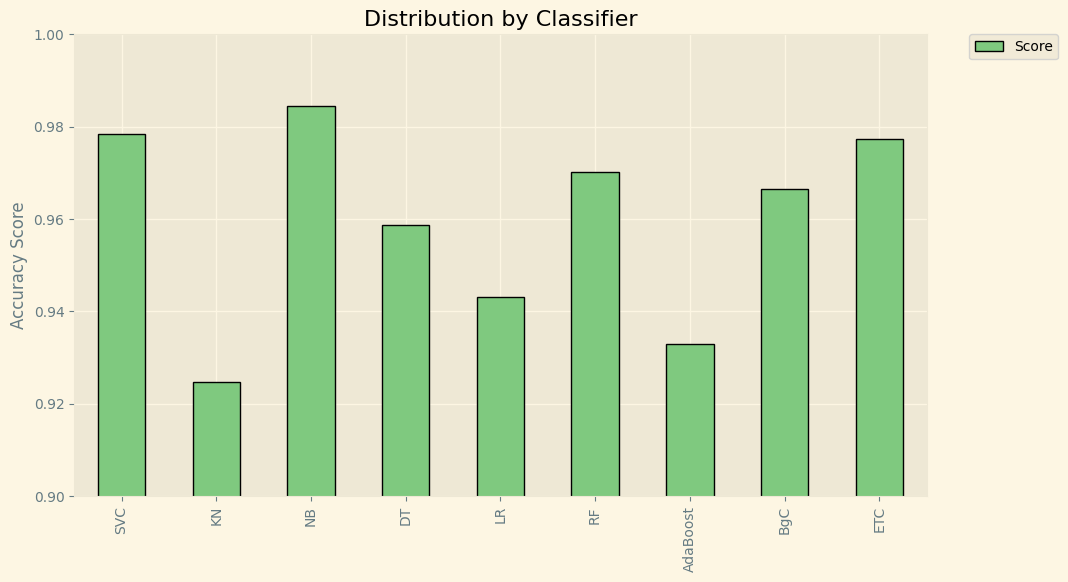

In [ ]:
# Строим столбчатую диаграмму (bar plot) из DataFrame df:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")

# Настраиваем метки на оси X:
plt.xticks(np.arange(9), df.index)

# Добавляем подпись к оси Y
plt.ylabel('Accuracy Score')

# Добавляем заголовок графика
plt.title('Distribution by Classifier')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like ensemble classifiers are not doing as good as expected.

### Stemmer

9) Дополнительная обработка текста

Define our stemmer function

In [ ]:
# Приводим слова к их основе (running - run) для улучшения качества анализа
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [ ]:
text_feat = text_feat.apply(stemmer) # применяем стемминг

In [ ]:
features = vectorizer.fit_transform(text_feat) # выполняет векторизацию текстовых данных

In [ ]:
# разделение на обучающую и тестовую
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [ ]:
# тестирует несколько моделей машинного обучения и сохраняет их точность в словарь
pred_dict={}
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_dict[k]=[accuracy_score(labels_test,pred)]

In [ ]:
# Создание нового DataFrame df2 из словаря pred_dict:
df2 = pd.DataFrame.from_dict(pred_dict, orient='index', columns=['Score2'])

# Объединение существующего DataFrame df с новым df2:
df = pd.concat([df, df2], axis=1)

# Вывод результирующего DataFrame df
df

,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.928230
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.933014,0.934809
BgC,0.966507,0.968900
ETC,0.977273,0.977871


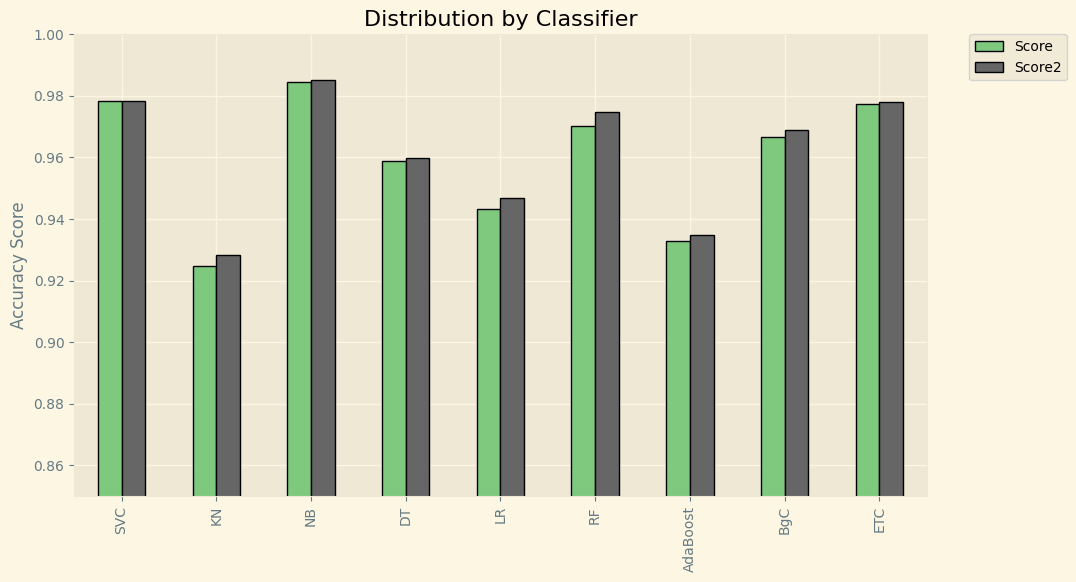

In [ ]:
# Построение столбчатой диаграммы из DataFrame df:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")

# Настройка меток на оси X:
plt.xticks(np.arange(9), df.index)

# Добавление подписи к оси Y (вертикальная ось)
plt.ylabel('Accuracy Score')

# Установка заголовка графика
plt.title('Distribution by Classifier')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like mostly the same . Ensemble classifiers doing a little bit better, NB still got the lead.

### Voting classifier

We are using ensemble algorithms here, but what about ensemble of ensembles? Will it beat NB?

10) Ансамблевые методы

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
#  строка создает ансамблевый классификатор на основе голосования, который объединяет несколько моделей для улучшения точности предсказаний
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [ ]:
eclf.fit(features_train,labels_train) # обучает ансамблевый классификатор (eclf)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(n_estimators=9,
                                                random_state=111)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=9,
                                                   random_state=111)),
                             ('RF',
                              RandomForestClassifier(n_estimators=31,
                                                     random_state=111)),
                             ('Ada',
                              AdaBoostClassifier(n_estimators=62,
                                                 random_state=111))],
                 voting='soft')

In [ ]:
pred = eclf.predict(features_test)

In [ ]:
print(accuracy_score(labels_test,pred))

0.9784688995215312


Better but nope.

### Final verdict - well tuned NaiveBayes is your friend in spam detection.